In [2]:
import random
import string
import numpy as np
import matplotlib.pyplot as plt
from hllpp import *
from utils import *
import pandas as pd

# K-Anominity to Number of Unique Patients

holding total number of patients and other HLL parameters constant, in sparse only, then in dense only, using nodes and aggregator

In [9]:
K = 10
P = 15
P_PRIME = 10
N_HOSPITALS = 2

In [10]:
p_non_k = []
h1_p_non_k = []
h2_p_non_k = []

for n_unique in range(1000, 10000, 500):
    h1, h2 = get_hospital_hlls(10000, n_unique, N_HOSPITALS, P, P_PRIME)
    h1_p_non_k.append(h1.proportion_not_k_anonymous(K))
    h2_p_non_k.append(h2.proportion_not_k_anonymous(K))
    aggregator = HyperLogLogPlusPlus(P, P_PRIME)
    aggregator.aggregate(h1)
    aggregator.aggregate(h2)
    proportion = aggregator.proportion_not_k_anonymous(K)
    p_non_k.append(proportion)


converting to dense
converting to dense
exceeded or dense
converting to dense
converting to dense
exceeded or dense
converting to dense
converting to dense
converting to dense
converting to dense
exceeded or dense
converting to dense
converting to dense
exceeded or dense
converting to dense
converting to dense
converting to dense
converting to dense
exceeded or dense
converting to dense
converting to dense
exceeded or dense
converting to dense
converting to dense
converting to dense
converting to dense
exceeded or dense
converting to dense
converting to dense
exceeded or dense
converting to dense
converting to dense
converting to dense
converting to dense
exceeded or dense
converting to dense
converting to dense
exceeded or dense
converting to dense
converting to dense
converting to dense
converting to dense
exceeded or dense
converting to dense
converting to dense
exceeded or dense
converting to dense
converting to dense
converting to dense
converting to dense
exceeded or dense
conver

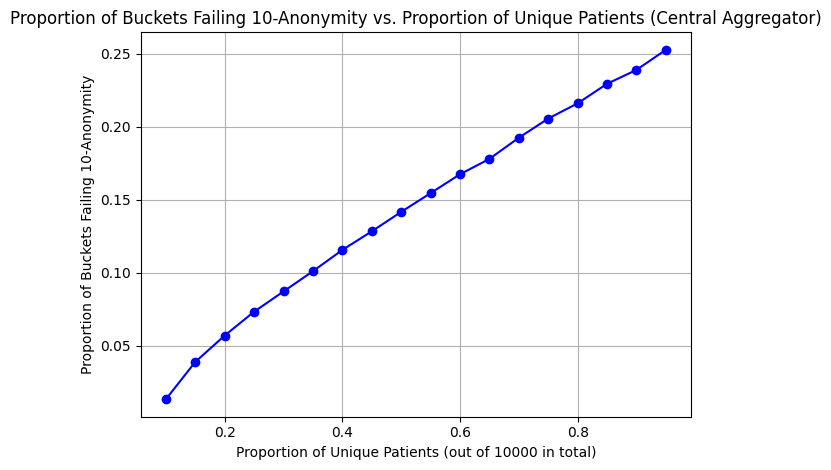

In [11]:
# plt.figure(figsize=(8, 5))
plt.plot(np.array(range(1000, 10000, 500))/10000, np.array(p_non_k), marker='o', linestyle='-', color='b')
plt.title("Proportion of Buckets Failing 10-Anonymity vs. Proportion of Unique Patients (Central Aggregator)")
plt.xlabel("Proportion of Unique Patients (out of 10000 in total)")
plt.ylabel("Proportion of Buckets Failing 10-Anonymity")
plt.grid(True)
plt.tight_layout()
plt.show()

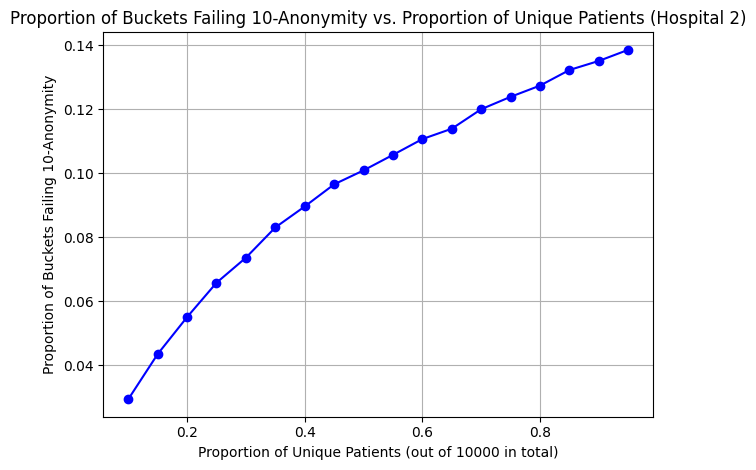

In [14]:
plt.plot(np.array(range(1000, 10000, 500))/10000, np.array(h2_p_non_k), marker='o', linestyle='-', color='b')
plt.title("Proportion of Buckets Failing 10-Anonymity vs. Proportion of Unique Patients (Hospital 2)")
plt.xlabel("Proportion of Unique Patients (out of 10000 in total)")
plt.ylabel("Proportion of Buckets Failing 10-Anonymity")
plt.grid(True)
plt.tight_layout()
plt.show()

## K-anonymity to Ratio of # Unique Patients to # Buckets

In [15]:
p_non_k = []
h1_p_non_k = []
h2_p_non_k = []
ratios = []
for n_unique in range(1000, 10000, 500):
    for p in reversed(range(5, 20, 5)):
        ratios.append(n_unique/p)
        h1, h2 = get_hospital_hlls(10000, n_unique, N_HOSPITALS, p, p-3)
        h1_p_non_k.append(h1.proportion_not_k_anonymous(K))
        h2_p_non_k.append(h2.proportion_not_k_anonymous(K))
        aggregator = HyperLogLogPlusPlus(p, p-3)
        aggregator.aggregate(h1)
        aggregator.aggregate(h2)
        proportion = aggregator.proportion_not_k_anonymous(K)
        p_non_k.append(proportion)

converting to dense
converting to dense
exceeded or dense
converting to dense
converting to dense
exceeded or dense
converting to dense
converting to dense
converting to dense
converting to dense
exceeded or dense
converting to dense
converting to dense
exceeded or dense
converting to dense
converting to dense
converting to dense
converting to dense
exceeded or dense
converting to dense
converting to dense
exceeded or dense
converting to dense
converting to dense
converting to dense
converting to dense
exceeded or dense
converting to dense
converting to dense
exceeded or dense
converting to dense
converting to dense
converting to dense
converting to dense
exceeded or dense
converting to dense
converting to dense
exceeded or dense
converting to dense
converting to dense
converting to dense
converting to dense
exceeded or dense
converting to dense
converting to dense
exceeded or dense
converting to dense
converting to dense
converting to dense
converting to dense
exceeded or dense
conver

In [59]:
# Initialize an empty DataFrame
df = pd.DataFrame(columns=['p', 'n_unique', 'ratios', 'h1_p_non_k', 'h2_p_non_k', 'p_non_k'])
p_list = list(reversed(range(5, 20, 1)))

for n_unique in range(1000, 10000, 500):
    for p in p_list:
        ratio = n_unique / (2 ** p)
        h1, h2 = get_hospital_hlls(10000, n_unique, N_HOSPITALS, p, p-3)
        h1_p_non_k = h1.proportion_not_k_anonymous(K)
        h2_p_non_k = h2.proportion_not_k_anonymous(K)
        aggregator = HyperLogLogPlusPlus(p, p-3)
        aggregator.aggregate(h1)
        aggregator.aggregate(h2)
        p_non_k = aggregator.proportion_not_k_anonymous(K)

        row = pd.DataFrame({
            'p': [p],
            'n_unique': [n_unique],
            'ratios': [ratio],
            'h1_p_non_k': [h1_p_non_k],
            'h2_p_non_k': [h2_p_non_k],
            'p_non_k': [p_non_k]
        })
        df = pd.concat([df, row], ignore_index=True)

# View the DataFrame
df

converting to dense
converting to dense
exceeded or dense
converting to dense
converting to dense
exceeded or dense
converting to dense
converting to dense
converting to dense
converting to dense


/var/folders/m6/1f4mj0md143cc20zys0r3jfm0000gn/T/ipykernel_75057/868589450.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, row], ignore_index=True)


exceeded or dense
converting to dense
converting to dense
exceeded or dense
converting to dense
converting to dense
converting to dense
converting to dense
exceeded or dense
converting to dense
converting to dense
exceeded or dense
converting to dense
converting to dense
converting to dense
converting to dense
exceeded or dense
converting to dense
converting to dense
exceeded or dense
converting to dense
converting to dense
converting to dense
converting to dense
exceeded or dense
converting to dense
converting to dense
exceeded or dense
converting to dense
converting to dense
converting to dense
converting to dense
exceeded or dense
converting to dense
converting to dense
exceeded or dense
converting to dense
converting to dense
converting to dense
converting to dense
exceeded or dense
converting to dense
converting to dense
exceeded or dense
converting to dense
converting to dense
converting to dense
converting to dense
exceeded or dense
converting to dense
converting to dense
exceed

,p,n_unique,ratios,h1_p_non_k,h2_p_non_k,p_non_k
0,19,1000,0.001907,0.001831,0.001831,0.000908
1,18,1000,0.003815,0.003685,0.003681,0.001713
2,17,1000,0.007629,0.007271,0.007469,0.003426
3,16,1000,0.015259,0.014679,0.014648,0.006622
4,15,1000,0.030518,0.029449,0.029114,0.014130
...,...,...,...,...,...,...
265,9,9500,18.554688,1.000000,1.000000,1.000000
266,8,9500,37.109375,1.000000,0.996094,1.000000
267,7,9500,74.218750,1.000000,1.000000,1.000000
268,6,9500,148.437500,1.000000,1.000000,1.000000


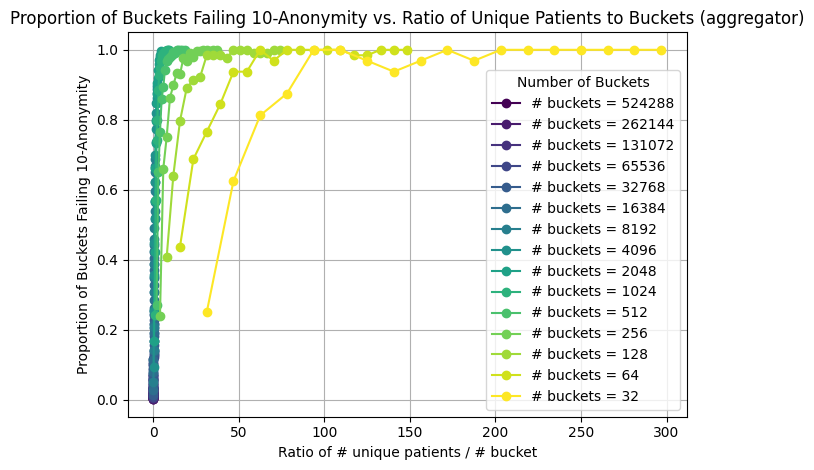

In [60]:
df_sorted = df.sort_values(by='ratios')
colors = plt.cm.viridis(np.linspace(0, 1, len(p_list)))
for i, p_val in enumerate(p_list):
    group_data = df_sorted[df_sorted['p'] == p_val]
    plt.plot(group_data['ratios'], group_data['p_non_k'], 
                label=f'# buckets = {2 ** p_val}', color=colors[i],  marker='o', linestyle='-')
plt.title("Proportion of Buckets Failing 10-Anonymity vs. Ratio of Unique Patients to Buckets (aggregator)")
plt.xlabel("Ratio of # unique patients / # bucket")
plt.ylabel("Proportion of Buckets Failing 10-Anonymity")
plt.legend(title='Number of Buckets')
plt.grid(True)
plt.tight_layout()
plt.show()

# Removing Patient To See Distribution Change

In [32]:
p, p_prime = 14, 10
K=10
unique_patients_total = 6000
patients_total = 10000
patients_all = generate_patients_with_duplicates(unique_patients_total, patients_total, 10)

In [33]:
hllpp_original = HyperLogLogPlusPlus(p, p_prime)
for patient in patients_all:
    hllpp_original.add(patient)
original_p_non_k = hllpp_original.proportion_not_k_anonymous(K)
print(original_p_non_k)
print(hllpp_original.mode)

converting to dense
0.3048095703125
dense


In [34]:
hllpp_original.mode
hllpp_original.estimate()

small cardinality
16384 11390 16384
in linear count: m= 16384 , V= 11390


5956.722219384939

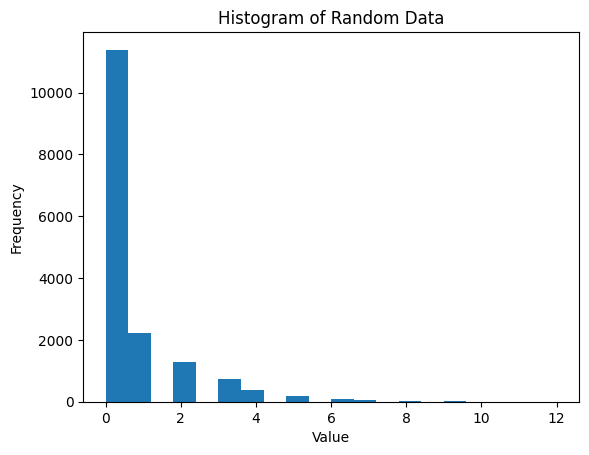

In [35]:
plt.hist(hllpp_original.registers, bins=20)  # `bins` sets the number of bins

# Add titles and labels
plt.title('Histogram of Random Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show plot
plt.show()

In [36]:
patients_all_removed = [x for x in patients_all if x != 'W8f8CmeZfh']
# patients_all_removed.index('GPp9oJYfHf')
len(patients_all_removed)


10000

In [37]:
hllpp_removed = HyperLogLogPlusPlus(p, p_prime)
for patient in patients_all_removed:
    hllpp_removed.add(patient)
removed_p_non_k = hllpp_removed.proportion_not_k_anonymous(K)
print(removed_p_non_k)

converting to dense
0.3048095703125


In [38]:


hllpp_added = HyperLogLogPlusPlus(p, p_prime)
patients_all_added = patients_all.copy()
patients_all_added.append('NiNiPiPiYa')
for patient in patients_all_added:
    hllpp_added.add(patient)
added_p_non_k = hllpp_added.proportion_not_k_anonymous(K)
print(added_p_non_k)

converting to dense
0.30487060546875


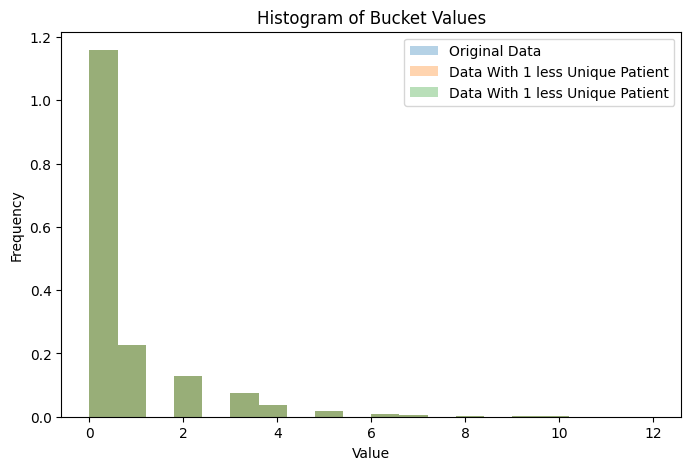

In [39]:
min_val = min(min(hllpp_removed.registers), min(hllpp_original.registers), min(hllpp_added.registers))
max_val = max(max(hllpp_removed.registers), max(hllpp_original.registers), max(hllpp_added.registers))

bin_edges = np.linspace(min_val, max_val, 20 + 1)
plt.figure(figsize=(8, 5))
plt.hist(hllpp_original.registers, bins=bin_edges, alpha=0.33, density=True, label='Original Data')
plt.hist(hllpp_removed.registers, bins=bin_edges, alpha=0.33, density=True, label='Data With 1 less Unique Patient')
plt.hist(hllpp_added.registers, bins=bin_edges, alpha=0.33, density=True, label='Data With 1 less Unique Patient')


plt.title('Histogram of Bucket Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# Show plot
plt.show()

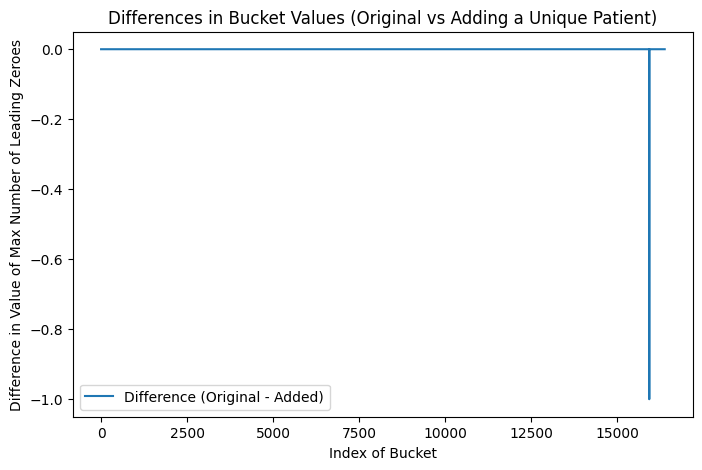

In [40]:
# Calculate differences
diff_removed = np.array(hllpp_original.registers) - np.array(hllpp_removed.registers)
diff_added = np.array(hllpp_original.registers) - np.array(hllpp_added.registers)

# Plot the difference
plt.figure(figsize=(8, 5))
# plt.plot(diff_removed, label='Difference (Original - Removed)')
plt.plot(diff_added, label='Difference (Original - Added)')
plt.legend()
plt.title('Differences in Bucket Values (Original vs Adding a Unique Patient)')
plt.xlabel('Index of Bucket')
plt.ylabel('Difference in Value of Max Number of Leading Zeroes')
# plt.ylim(-3, 3)
# plt.yticks([-3, -2, -1, 0, 1, 2, 3])
plt.show()

In [97]:
df = pd.DataFrame(columns=['added_p_non_k', 'removed_p_non_k', 'change', 'trial', 'add_n_bucket_change', 'remove_n_bucket_change', 'add_estimate_change', 'remove_estimate_change'])

# hllpp_original = HyperLogLogPlusPlus(p=p, p_prime=p_prime)
# for patient in patients_all:
#     hllpp_original.add(patient)
# original_p_non_k = hllpp_original.proportion_not_k_anonymous(K)

max_add_change = [0] * 10
max_remove_change = [0] * 10
for trial in range(100):
    for change in range(1, 11):
        # add change number of new unique patients
        patients_all_added = patients_all.copy()
        while len(patients_all_added) != patients_total + change:
            patient_id = ''.join(random.choices(string.ascii_letters + string.digits, k=10))
            if patient_id not in patients_all_added:
                patients_all_added.append(patient_id)
        hllpp_added = HyperLogLogPlusPlus(p, p_prime)
        for patient in patients_all_added:
            hllpp_added.add(patient)
        added_p_non_k = hllpp_added.proportion_not_k_anonymous(K)
        n_bucket_change_add = 0
        max_change_add = 0
        for original, added in zip(hllpp_original.registers, hllpp_added.registers):
            max_add_change[change-1] = max(max_add_change[change-1], abs(original - added))
            if original != added:
                n_bucket_change_add +=1
        add_estimate_change = abs(hllpp_original.estimate() - hllpp_added.estimate())

        # remove change number of unique patients
        patients_all_removed = patients_all.copy()
        while len(set(patients_all_removed))!= unique_patients_total - change:
            to_remove = patients_all_removed[random.randint(0, len(patients_all_removed)-1)]
            patients_all_removed = list(filter(lambda x: x != to_remove, patients_all_removed))
            # print(to_remove)
            # patients_all_removed = [x for x in patients_all_removed if x != patients_all_removed[random.randint(0, len(patients_all_removed)-1)]]
        hllpp_removed = HyperLogLogPlusPlus(p, p_prime)
        for patient in patients_all_removed:
            hllpp_removed.add(patient)
        removed_p_non_k = hllpp_removed.proportion_not_k_anonymous(K)
        remove_estimate_change = abs(hllpp_original.estimate() - hllpp_removed.estimate())

        n_bucket_change_remove = 0
        max_change_remove = 0
        for original, remove in zip(hllpp_original.registers, hllpp_removed.registers):
            max_remove_change[change-1] = max(max_remove_change[change-1], abs(original - remove))
            if original != remove:
                n_bucket_change_remove +=1
        # print('remove n change: ', n_bucket_change_remove)
        # print('remove max: ', max_change_remove)

        row = pd.DataFrame({
            'added_p_non_k':[added_p_non_k],
            'removed_p_non_k': [removed_p_non_k],
            'change': [change],
            'trial': [trial],
            'add_n_bucket_change': [n_bucket_change_add],
            'remove_n_bucket_change': [n_bucket_change_remove],
            'add_estimate_change': [add_estimate_change],
            'remove_estimate_change': [remove_estimate_change],
        })
        df = pd.concat([df, row], ignore_index=True)


converting to dense
small cardinality
16384 11390 16384
in linear count: m= 16384 , V= 11390
small cardinality
16384 11389 16384
in linear count: m= 16384 , V= 11389
converting to dense
small cardinality
16384 11390 16384
in linear count: m= 16384 , V= 11390
small cardinality
16384 11391 16384
in linear count: m= 16384 , V= 11391
converting to dense
small cardinality
16384 11390 16384
in linear count: m= 16384 , V= 11390
small cardinality
16384 11390 16384
in linear count: m= 16384 , V= 11390
converting to dense
small cardinality
16384 11390 16384
in linear count: m= 16384 , V= 11390
small cardinality
16384 11392 16384
in linear count: m= 16384 , V= 11392
converting to dense
small cardinality
16384 11390 16384
in linear count: m= 16384 , V= 11390
small cardinality
16384 11388 16384
in linear count: m= 16384 , V= 11388
converting to dense
small cardinality
16384 11390 16384
in linear count: m= 16384 , V= 11390
small cardinality
16384 11393 16384
in linear count: m= 16384 , V= 11393
conv

/var/folders/m6/1f4mj0md143cc20zys0r3jfm0000gn/T/ipykernel_82726/3121947128.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, row], ignore_index=True)


converting to dense
small cardinality
16384 11390 16384
in linear count: m= 16384 , V= 11390
small cardinality
16384 11394 16384
in linear count: m= 16384 , V= 11394
converting to dense
small cardinality
16384 11390 16384
in linear count: m= 16384 , V= 11390
small cardinality
16384 11386 16384
in linear count: m= 16384 , V= 11386
converting to dense
small cardinality
16384 11390 16384
in linear count: m= 16384 , V= 11390
small cardinality
16384 11394 16384
in linear count: m= 16384 , V= 11394
converting to dense
small cardinality
16384 11390 16384
in linear count: m= 16384 , V= 11390
small cardinality
16384 11384 16384
in linear count: m= 16384 , V= 11384
converting to dense
small cardinality
16384 11390 16384
in linear count: m= 16384 , V= 11390
small cardinality
16384 11395 16384
in linear count: m= 16384 , V= 11395
converting to dense
small cardinality
16384 11390 16384
in linear count: m= 16384 , V= 11390
small cardinality
16384 11383 16384
in linear count: m= 16384 , V= 11383
conv

In [98]:
# result = df.groupby('change')['add_n_bucket_change'].mean().reset_index()
result = df.groupby('change').mean().reset_index().drop(columns='trial')
result

,change,added_p_non_k,removed_p_non_k,add_n_bucket_change,remove_n_bucket_change,add_estimate_change,remove_estimate_change
0,1,0.304849,0.304774,0.73,0.69,0.920651,0.848651
1,2,0.304894,0.304725,1.59,1.52,1.999602,1.999303
2,3,0.304936,0.304680,2.37,2.38,2.977917,3.049197
3,4,0.304985,0.304650,3.23,3.03,4.128939,3.753887
4,5,0.305025,0.304591,3.96,4.0,5.078592,5.148779
5,6,0.305069,0.304562,4.68,4.68,6.114666,5.824620
6,7,0.305103,0.304520,5.56,5.53,6.906129,6.831157
7,8,0.305154,0.304488,6.34,6.16,8.129384,7.578798
8,9,0.305191,0.304437,7.11,6.89,8.992933,8.786470
9,10,0.305230,0.304388,7.78,7.84,9.914074,9.936580


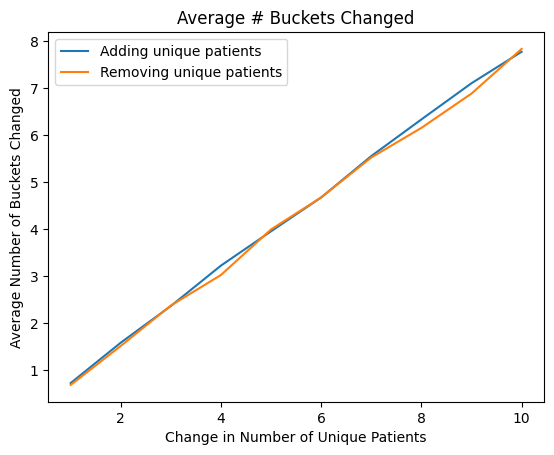

In [99]:
plt.plot(result['change'], result['add_n_bucket_change'], label='Adding unique patients')
plt.plot(result['change'], result['remove_n_bucket_change'], label='Removing unique patients')


plt.title('Average # Buckets Changed')
plt.xlabel('Change in Number of Unique Patients')
plt.ylabel('Average Number of Buckets Changed')
plt.legend()

# Show plot
plt.show()

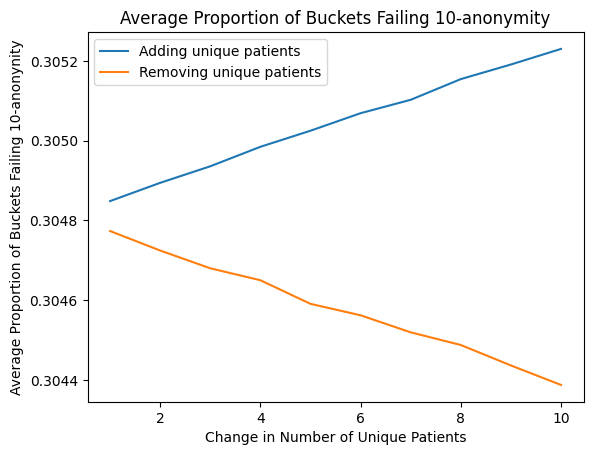

In [100]:
plt.plot(result['change'], result['added_p_non_k'], label='Adding unique patients')
plt.plot(result['change'], result['removed_p_non_k'], label='Removing unique patients')


plt.title('Average Proportion of Buckets Failing 10-anonymity')
plt.xlabel('Change in Number of Unique Patients')
plt.ylabel('Average Proportion of Buckets Failing 10-anonynity')
plt.legend()

# Show plot
plt.show()

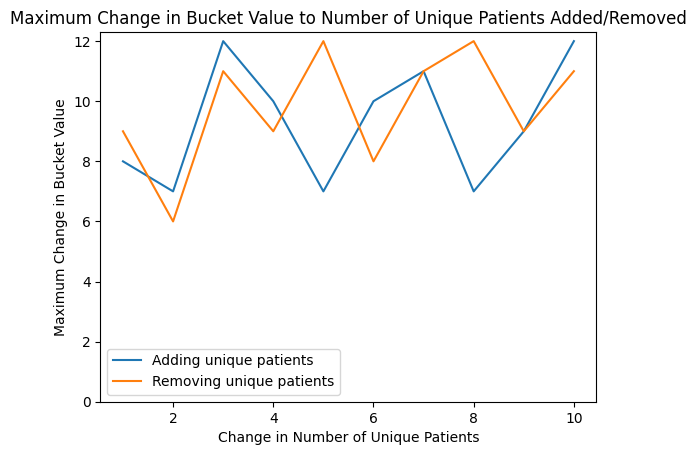

In [101]:
plt.plot(result['change'], max_add_change, label='Adding unique patients')
plt.plot(result['change'], max_remove_change, label='Removing unique patients')


plt.title('Maximum Change in Bucket Value to Number of Unique Patients Added/Removed')
plt.xlabel('Change in Number of Unique Patients')
plt.ylabel('Maximum Change in Bucket Value')
plt.ylim(bottom=0)
plt.legend()

# Show plot
plt.show()

In [ ]:
df = pd.DataFrame(columns=['added_p_non_k', 'removed_p_non_k', 'change', 'trial', 'add_n_bucket_change', 'remove_n_bucket_change', 'add_estimate_change', 'remove_estimate_change'])

max_add_change = [0] * 10
max_remove_change = [0] * 10
for trial in range(100):
    for change in range(1, 11):
        # add change number of new unique patients
        patients_all_added = patients_all.copy()
        while len(patients_all_added) != patients_total + change:
            patient_id = ''.join(random.choices(string.ascii_letters + string.digits, k=10))
            if patient_id not in patients_all_added:
                patients_all_added.append(patient_id)
        hllpp_added = HyperLogLogPlusPlus(p, p_prime)
        for patient in patients_all_added:
            hllpp_added.add(patient)
        added_p_non_k = hllpp_added.proportion_not_k_anonymous(K)
        n_bucket_change_add = 0
        max_change_add = 0
        for original, added in zip(hllpp_original.registers, hllpp_added.registers):
            max_add_change[change-1] = max(max_add_change[change-1], abs(original - added))
            if original != added:
                n_bucket_change_add +=1
        add_estimate_change = abs(hllpp_original.estimate() - hllpp_added.estimate())

        # remove change number of unique patients
        patients_all_removed = patients_all.copy()
        while len(set(patients_all_removed))!= unique_patients_total - change:
            to_remove = patients_all_removed[random.randint(0, len(patients_all_removed)-1)]
            patients_all_removed = list(filter(lambda x: x != to_remove, patients_all_removed))
            # print(to_remove)
            # patients_all_removed = [x for x in patients_all_removed if x != patients_all_removed[random.randint(0, len(patients_all_removed)-1)]]
        hllpp_removed = HyperLogLogPlusPlus(p, p_prime)
        for patient in patients_all_removed:
            hllpp_removed.add(patient)
        removed_p_non_k = hllpp_removed.proportion_not_k_anonymous(K)
        remove_estimate_change = abs(hllpp_original.estimate() - hllpp_removed.estimate())

        n_bucket_change_remove = 0
        max_change_remove = 0
        for original, remove in zip(hllpp_original.registers, hllpp_removed.registers):
            max_remove_change[change-1] = max(max_remove_change[change-1], abs(original - remove))
            if original != remove:
                n_bucket_change_remove +=1
        # print('remove n change: ', n_bucket_change_remove)
        # print('remove max: ', max_change_remove)

        row = pd.DataFrame({
            'added_p_non_k':[added_p_non_k],
            'removed_p_non_k': [removed_p_non_k],
            'change': [change],
            'trial': [trial],
            'add_n_bucket_change': [n_bucket_change_add],
            'remove_n_bucket_change': [n_bucket_change_remove],
            'add_estimate_change': [add_estimate_change],
            'remove_estimate_change': [remove_estimate_change],
        })
        df = pd.concat([df, row], ignore_index=True)


In [ ]:
df_sorted = df.sort_values(by='ratios')
colors = plt.cm.viridis(np.linspace(0, 1, len(p_list)))
for i, p_val in enumerate(p_list):
    group_data = df_sorted[df_sorted['p'] == p_val]
    plt.plot(group_data['ratios'], group_data['p_non_k'], 
                label=f'# buckets = {2 ** p_val}', color=colors[i],  marker='o', linestyle='-')
plt.title("Proportion of Buckets Failing 10-Anonymity vs. Ratio of Unique Patients to Buckets (aggregator)")
plt.xlabel("Ratio of # unique patients / # bucket")
plt.ylabel("Proportion of Buckets Failing 10-Anonymity")
plt.legend(title='Number of Buckets')
plt.grid(True)
plt.tight_layout()
plt.show()

In [69]:
print(len(hllpp_original.registers))
print(len(hllpp_removed.registers))
print(hllpp_original.registers[:15])
print(hllpp_added.registers[:15])

16384
16384
[0 0 0 1 2 1 2 0 0 1 0 0 0 0 1]
[0 0 0 1 2 1 2 0 0 1 0 0 0 0 1]


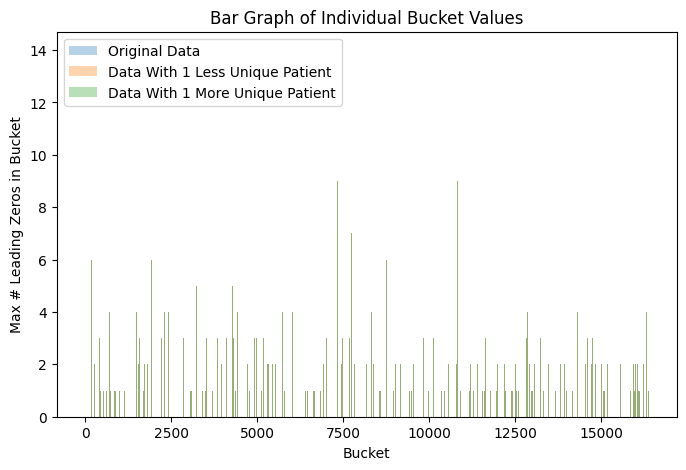

In [70]:
plt.figure(figsize=(8, 5))
plt.bar(range(len(hllpp_original.registers)),hllpp_original.registers, alpha=0.33, label='Original Data')
plt.bar(range(len(hllpp_removed.registers)),hllpp_removed.registers, alpha=0.33, label='Data With 1 Less Unique Patient')
plt.bar(range(len(hllpp_added.registers)),hllpp_added.registers, alpha=0.33, label='Data With 1 More Unique Patient')

# plt.bar(hllpp_removed.registers, bins=bin_edges, alpha=0.33, density=True, label='Data With 1 less Unique Patient')
# plt.bar(hllpp_added.registers, bins=bin_edges, alpha=0.33, density=True, label='Data With 1 less Unique Patient')


plt.title('Bar Graph of Individual Bucket Values')
plt.xlabel('Bucket')
plt.ylabel('Max # Leading Zeros in Bucket')
plt.legend()

# Show plot
plt.show()

In [107]:
hllpp_original.mode

'dense'

# How bucket size effects k-anonymity

In [1]:
unique_patients_total = 6000
patients_total = 10000
patients_all = generate_patients_with_duplicates(unique_patients_total, patients_total, 10)

NameError: name 'generate_patients_with_duplicates' is not defined

In [ ]:
p_non_k_for_diff_p = []
for p in range(20, 30, 2):
    hllpp_original = HyperLogLogPlusPlus(p, 25)
    for patient in patients_all:
        hllpp_original.add(patient)
    original_p_non_k = hllpp_original.proportion_not_k_anonymous(K)
    print(hllpp_original.mode)
    p_non_k_for_diff_p.append(original_p_non_k)


In [129]:
p_non_k_for_diff_p

[0.947265625,
 0.5252685546875,
 0.16802978515625,
 0.04480743408203125,
 0.011379241943359375,
 0.002857208251953125,
 0.0007150173187255859,
 0.00017878413200378418]

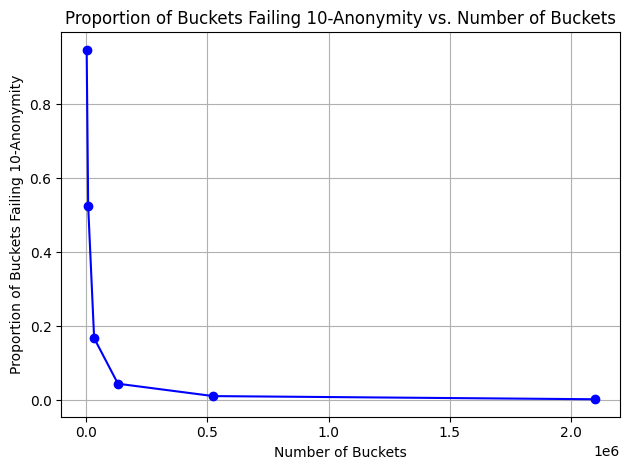

In [136]:
plt.plot(2**(np.array(range(11, 30, 2))[:6]), np.array(p_non_k_for_diff_p)[:6], marker='o', linestyle='-', color='b')
plt.title("Proportion of Buckets Failing 10-Anonymity vs. Number of Buckets")
plt.xlabel("Number of Buckets")
plt.ylabel("Proportion of Buckets Failing 10-Anonymity")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
unique_patients_total = 6000
patients_total = 10000
patients_all = generate_patients_with_duplicates(unique_patients_total, patients_total, 10)

node = HyperLogLogPlusPlus(p=14, p_prime=25)
for patient in patients_all:
    node.add(patient)

p_non_k = node.proportion_not_k_anonymous(K)
print(p_non_k)

estimated_num_unique = node.estimate()
print(estimated_num_unique)


# HLL and HLL++

In [3]:
unique_patients_total = 160
patients_total = 200
K=10

hll_estimates = []
hllpp_estimates = []
hll_k = []
hllpp_k = []
for _ in range(10):
    patients_all = generate_patients_with_duplicates(unique_patients_total, patients_total, 10)

    node_hll = HyperLogLogPlusPlus(p=14, p_prime=25, regularHLL=True)
    for patient in patients_all:
        node_hll.add(patient)

    hll_estimates.append(node_hll.estimate())
    hll_k.append(node_hll.proportion_not_k_anonymous(K))
    print(node_hll.mode)

    # node_hllpp = HyperLogLogPlusPlus(p=14, p_prime=25, regularHLL=False)
    # for patient in patients_all:
    #     node_hllpp.add(patient)

    # hllpp_estimates.append(node_hllpp.estimate())
    # hllpp_k.append(node_hllpp.proportion_not_k_anonymous(K))
print(np.mean(hll_estimates))
print(np.mean(hllpp_estimates))
print(np.mean(hll_k))
print(np.mean(hllpp_k))


dense
dense
dense
dense
dense
dense
dense
dense
dense
dense
16277.469580078125
nan
0.009716796875
nan


/Users/malindalu/.julia/conda/3/aarch64/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/malindalu/.julia/conda/3/aarch64/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [3]:
unique_patients_total = 160
patients_total = 200
K=10

hll_estimates = []
hllpp_estimates = []
hll_k = []
hllpp_k = []
for _ in range(10):
    patients_all = generate_patients_with_duplicates(unique_patients_total, patients_total, 10)

    node_hll = HyperLogLogPlusPlus(p=14, p_prime=25, regularHLL=True)
    for patient in patients_all:
        node_hll.add(patient)

    hll_estimates.append(node_hll.estimate())
    hll_k.append(node_hll.proportion_not_k_anonymous(K))
    print(node_hll.mode)

    node_hllpp = HyperLogLogPlusPlus(p=14, p_prime=25, regularHLL=False)
    for patient in patients_all:
        node_hllpp.add(patient)

    hllpp_estimates.append(node_hllpp.estimate())
    hllpp_k.append(node_hllpp.proportion_not_k_anonymous(K))

    print(node_hllpp.mode)
print(np.mean(hll_estimates))
print(np.mean(hllpp_estimates))
print(np.mean(hll_k))
print(np.mean(hllpp_k))


158
sparse
158
sparse
155
sparse
155
sparse
160
sparse
160
sparse
160
sparse
160
sparse
160
sparse
160
sparse
159
sparse
159
sparse
159
sparse
159
sparse
158
sparse
158
sparse
159
sparse
159
sparse
159
sparse
159
sparse
158.70037532361056
158.70037532361056
4.729628562927246e-06
4.729628562927246e-06
